<a href="https://colab.research.google.com/github/ISHWARYAPALANI/Recession/blob/main/Recessionishu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Quarter_Year           3000 non-null   object 
 1   Recession              3000 non-null   int64  
 2   Unemployment_Rate      3000 non-null   float64
 3   GDP_Growth             3000 non-null   float64
 4   Inflation              3000 non-null   float64
 5   Industrial_Production  3000 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 140.8+ KB
None
         Recession  Unemployment_Rate   GDP_Growth    Inflation  \
count  3000.000000        3000.000000  3000.000000  3000.000000   
mean      0.304000           6.072612     1.744696     2.289158   
std       0.460059           2.252699     1.703948     0.924896   
min       0.000000          -0.544933    -3.599992    -0.735852   
25%       0.000000           4.430211     0.643929     1.646296   
50%    

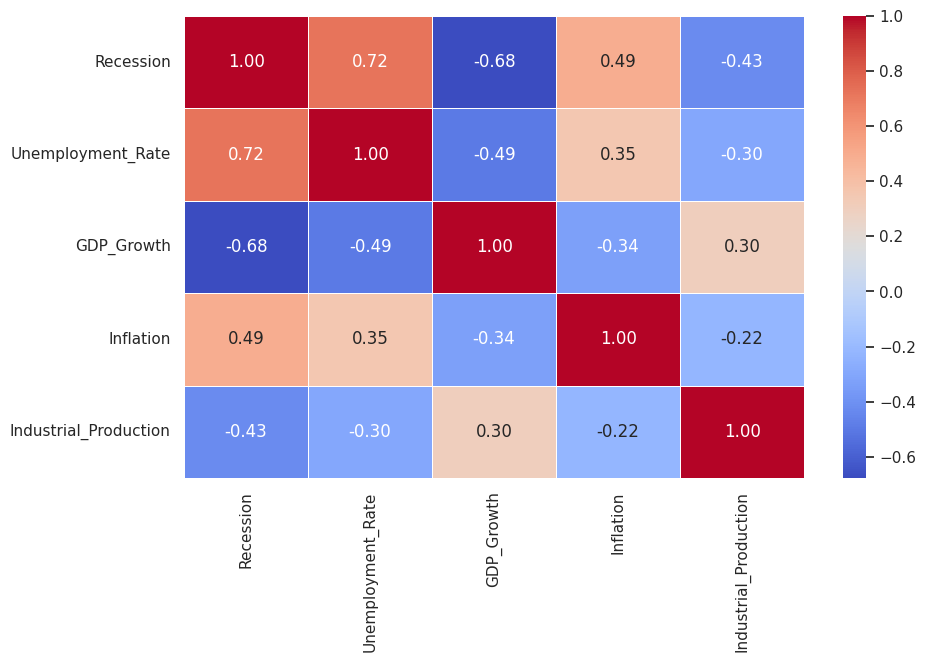

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/sample_data/Simulated_Recession_Data_2013_2024.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)  # Ensuring only numeric columns are considered

# Set up the figure
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)



# Show the plot
plt.show()


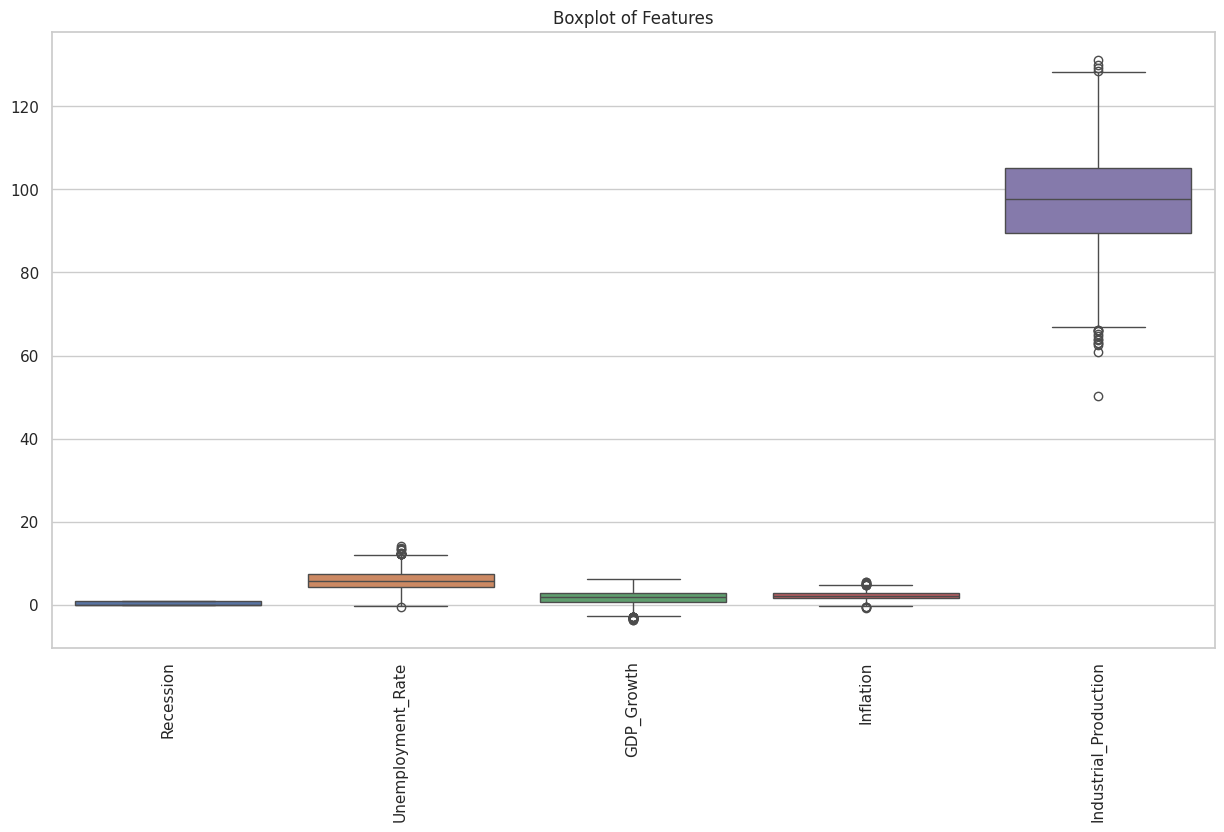

In [34]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()


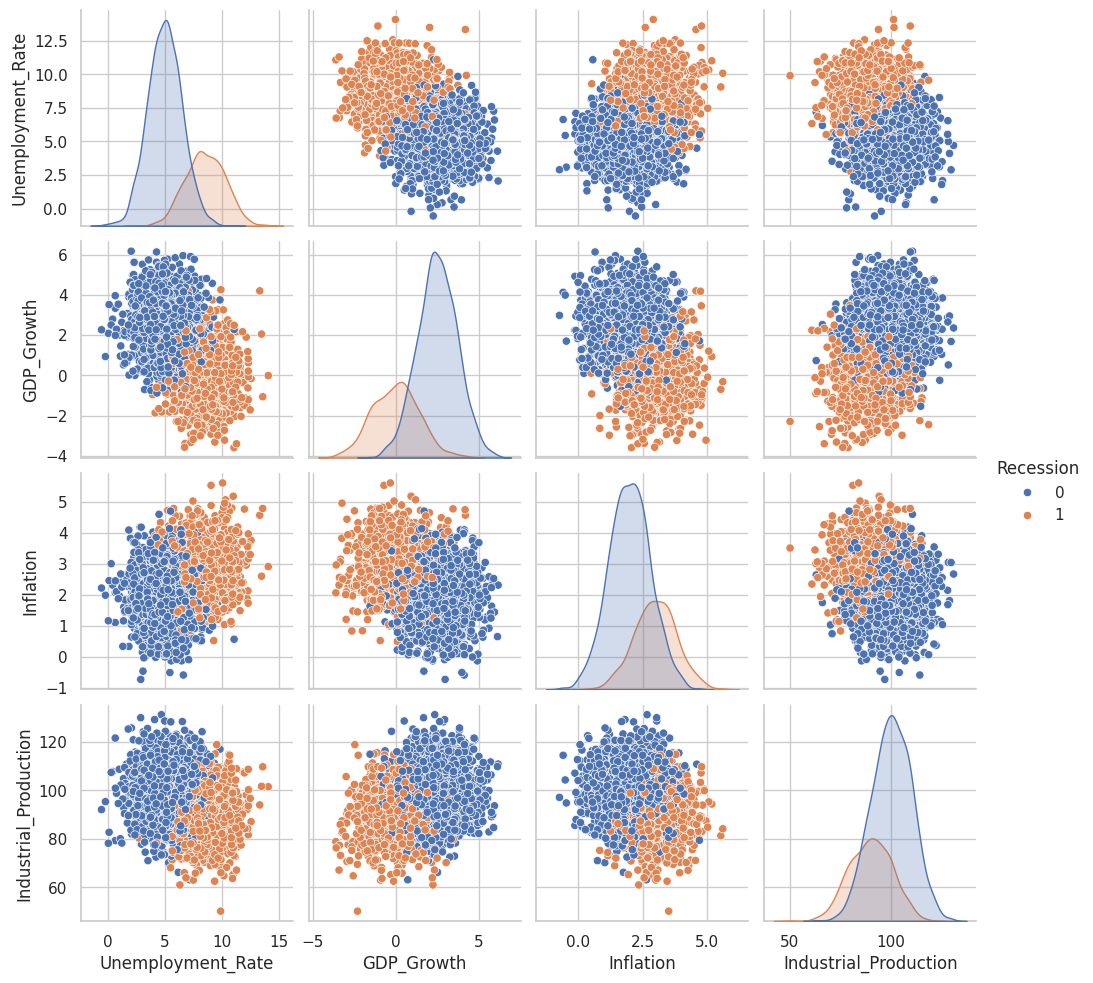

In [35]:
sns.pairplot(df, hue='Recession')  # Replace 'Recession' with your target column
plt.show()


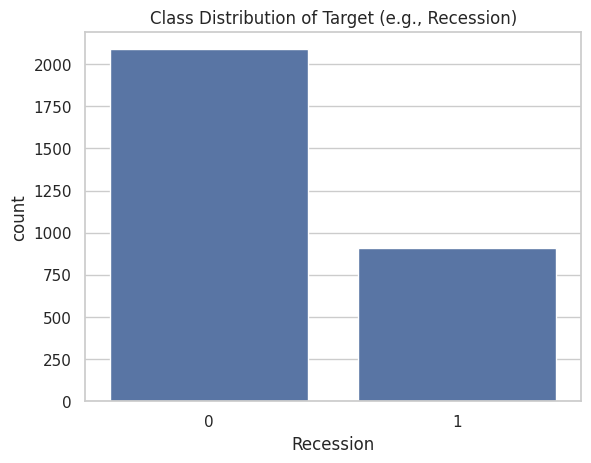

In [36]:
sns.countplot(x=y)
plt.title("Class Distribution of Target (e.g., Recession)")
plt.show()


In [6]:
!pip install --upgrade xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import xgboost

# Load dataset
file_path = "/content/sample_data/Simulated_Recession_Data_2013_2024.csv" # Changed file path
df = pd.read_csv(file_path)

# Inspect the DataFrame columns to understand the available data.
print("DataFrame Columns before one-hot encoding:", df.columns)
print("XGBoost Version:", xgboost.__version__)


# Create 'Year_Quarter' column if it does not exist. This was likely intended as 'Quarter_Year' column does not exist in the DataFrame
if 'Year' in df.columns and 'Quarter' in df.columns:
    df['Year_Quarter'] = df['Year'].astype(str) + '-' + df['Quarter']
elif 'Year_Quarter' in df.columns:
    print("The column 'Year_Quarter' already exists.")
else:
    print("The columns 'Year' and 'Quarter' are not available. Check the DataFrame.")


DataFrame Columns before one-hot encoding: Index(['Quarter_Year', 'Recession', 'Unemployment_Rate', 'GDP_Growth',
       'Inflation', 'Industrial_Production'],
      dtype='object')
XGBoost Version: 3.0.0
The columns 'Year' and 'Quarter' are not available. Check the DataFrame.


In [4]:
# One-Hot encode 'Quarter_Year' column
df = pd.get_dummies(df, columns=['Quarter_Year'], drop_first=True)

In [5]:
# Drop 'Year_Quarter' if it exists; handle the case where it does not.
if "Year_Quarter" in df.columns:
    df.drop(columns=["Year_Quarter"], inplace=True)
    print("Column 'Year_Quarter' dropped successfully.")
else:
    print("Column 'Year_Quarter' not found, skipping the drop operation.")

# Define features and target
if "Recession" in df.columns: # Added a check if the target variable exists
  X = df.drop(columns=["Recession"])
  y = df["Recession"]
else:
  raise KeyError("The 'Recession' column is not in the dataframe. Check input file.")


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "LDA": LinearDiscriminantAnalysis(),
    "SVM (Linear)": SVC(kernel='linear', probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False), #Added this to suppress a warning
    "Neural Network": MLPClassifier(max_iter=500),
    "SVM (RBF)": SVC(kernel='rbf', probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

# Create ensemble models
ensemble_models = {
    "Voting Classifier": VotingClassifier(estimators=[
        ("RF", RandomForestClassifier()),
        ("XGB", XGBClassifier(eval_metric='logloss', use_label_encoder=False))
        ], voting='soft'), #Added use_label_encoder to suppress a warning
    "Stacking Classifier": StackingClassifier(estimators=[
        ("RF", RandomForestClassifier()),
        ("XGB", XGBClassifier(eval_metric='logloss', use_label_encoder=False))
        ], final_estimator=LogisticRegression()) #Added use_label_encoder to suppress a warning
}




# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='F1-Score', ascending=False))

Column 'Year_Quarter' not found, skipping the drop operation.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:30:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


                  Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression  0.956667   0.952381  0.913706  0.932642
2          SVM (Linear)  0.956667   0.957219  0.908629  0.932292
1                   LDA  0.955000   0.961957  0.898477  0.929134
3         Random Forest  0.953333   0.956757  0.898477  0.926702
6             SVM (RBF)  0.953333   0.961749  0.893401  0.926316
4               XGBoost  0.945000   0.945652  0.883249  0.913386
5        Neural Network  0.943333   0.922280  0.903553  0.912821
9     Gradient Boosting  0.941667   0.950000  0.868020  0.907162
10             AdaBoost  0.931667   0.914894  0.873096  0.893506
8                   KNN  0.930000   0.958580  0.822335  0.885246
7         Decision Tree  0.911667   0.867347  0.862944  0.865140


                 Feature  Importance
1      Unemployment_Rate    0.412895
2             GDP_Growth    0.329237
3              Inflation    0.143376
4  Industrial_Production    0.085565
0           Quarter_Year    0.028926


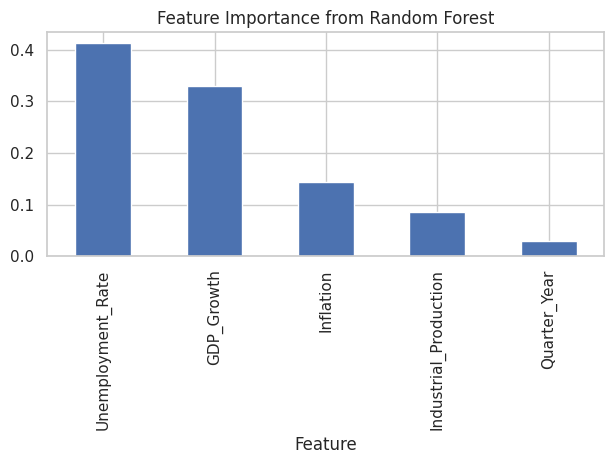

In [25]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Train a random forest
model = RandomForestClassifier()

# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate through columns of X_train and encode any object (string) columns
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = encoder.fit_transform(X_train[col])

# Fit the model after encoding
model.fit(X_train, y_train)

# Feature importance
importances = model.feature_importances_
features = X_train.columns

# Display
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(importance_df)

# Optional: Plot
importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("Simulated_Recession_Data_2013_2024.csv")

# Drop non-numerical or identifier columns if any (adjust as needed)
# For example: df = df.drop(columns=["Year", "Country"])
# If unsure, inspect with: print(df.dtypes)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Compute linkage matrix
linked = linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


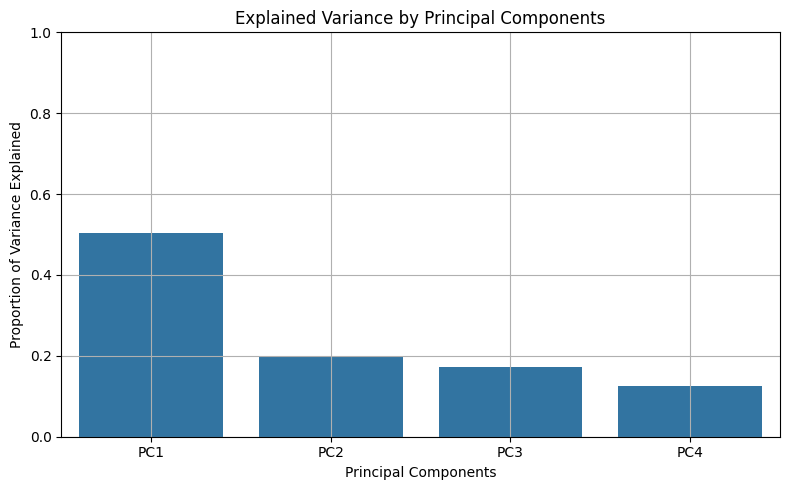

array([0.505, 0.196, 0.173, 0.126])

In [14]:
import pandas as pd # Import pandas for data manipulation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data here
df = pd.read_csv('/content/sample_data/Simulated_Recession_Data_2013_2024.csv') # Example: reading from a CSV file

# Select numeric predictor variables
features = ['Unemployment_Rate', 'GDP_Growth', 'Inflation', 'Industrial_Production']
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 5))
sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_variance))], y=explained_variance)
plt.title('Explained Variance by Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Components')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

# Return explained variance ratios
explained_variance.round(3)

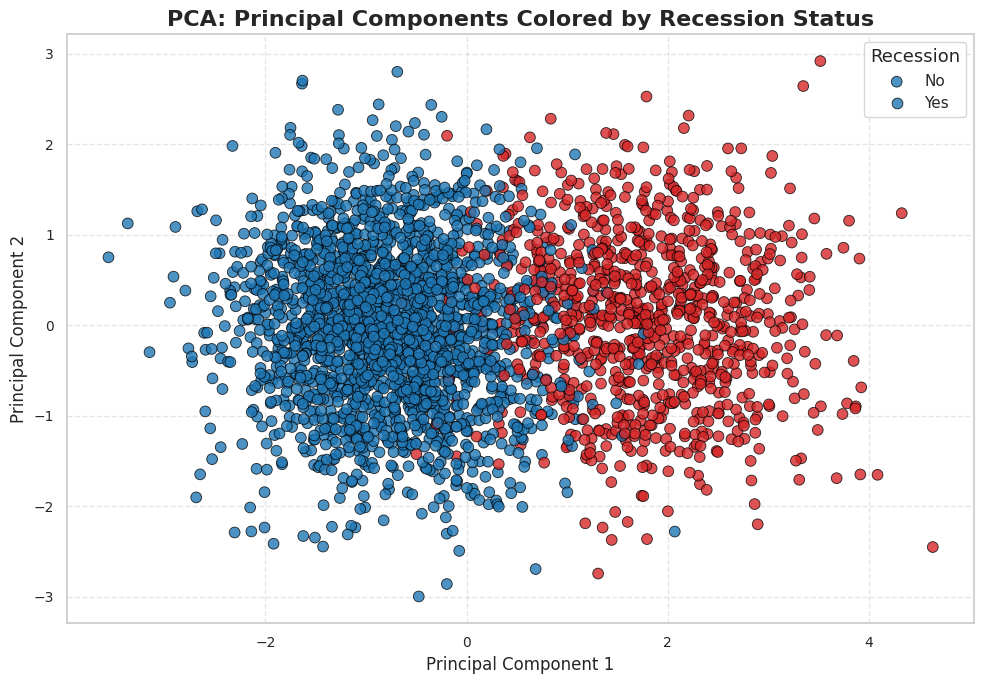

In [21]:
# Redesign the PCA plot with a more professional and polished color scheme and style
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

# Use a professional color palette
palette = {0: '#1f77b4', 1: '#d62728'}  # Blue for No Recession, Red for Recession

# Create the plot
scatter = sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='Recession',
    palette=palette,
    s=60,
    alpha=0.8,
    edgecolor='black'
)

# Enhance aesthetics
plt.title('PCA: Principal Components Colored by Recession Status', fontsize=16, weight='bold')
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Recession', labels=['No', 'Yes'], title_fontsize='13', fontsize='11')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
